In [1]:
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Load PyTorch model
with open('/content/resnet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model.eval()

In [4]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to your image
img_path = '/content/guitar.png'

# Load your PyTorch model and set it to evaluation mode
with open('/content/resnet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model = model.to(device)  # Move model to the same device
model.eval()

# Define the image preprocessing
def preprocess_image(img_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)  # Move tensor to the same device
    return img_tensor

# Preprocess the image and ensure it's on the right device
img_tensor = preprocess_image(img_path, device)

In [5]:
def compute_saliency_map(img_tensor):
    img_tensor.requires_grad = True
    output = model(img_tensor)
    output_idx = output.argmax()
    output_max = output[0, output_idx]
    output_max.backward()  # Compute gradients with respect to the predicted class
    saliency, _ = torch.max(img_tensor.grad.data.abs(), dim=1)  # Take the maximum across color channels
    return saliency

saliency = compute_saliency_map(img_tensor)

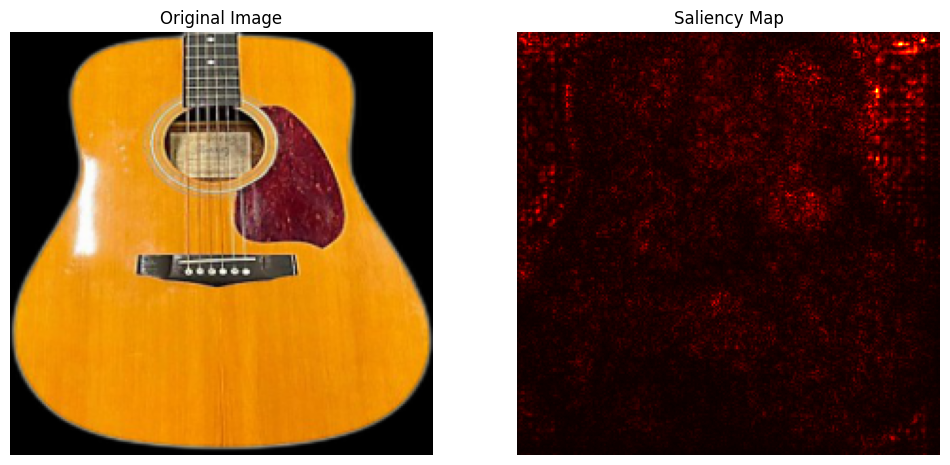

In [10]:
def visualize(img_tensor, saliency):
    img = img_tensor.squeeze().cpu().detach().numpy()
    img = np.transpose(img, (1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(saliency[0].cpu().numpy(), cmap='hot')
    plt.title('Saliency Map')
    plt.axis('off')
    plt.show()

visualize(img_tensor, saliency)



```
# Second Saliency Map
```



In [ ]:
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle


# Load PyTorch model
with open('/content/densenet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model.eval()


In [ ]:

import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to your image
img_path = '/content/guitar_2.png'

# Load your PyTorch model and set it to evaluation mode
with open('/content/densenet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model = model.to(device)  # Move model to the same device
model.eval()

# Define the image preprocessing
def preprocess_image(img_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)  # Move tensor to the same device
    return img_tensor

# Preprocess the image and ensure it's on the right device
img_tensor = preprocess_image(img_path, device)




def compute_saliency_map(img_tensor):
    img_tensor.requires_grad = True
    output = model(img_tensor)
    output_idx = output.argmax()
    output_max = output[0, output_idx]
    output_max.backward()  # Compute gradients with respect to the predicted class
    saliency, _ = torch.max(img_tensor.grad.data.abs(), dim=1)  # Take the maximum across color channels
    return saliency

saliency = compute_saliency_map(img_tensor)




def visualize(img_tensor, saliency):
    img = img_tensor.squeeze().cpu().detach().numpy()
    img = np.transpose(img, (1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(saliency[0].cpu().numpy(), cmap='hot')
    plt.title('Saliency Map')
    plt.axis('off')
    plt.show()

visualize(img_tensor, saliency)

In [ ]:
# Load PyTorch model
with open('/content/squeezenet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model.eval()

Third Saliency Map

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to your image
img_path = '/content/guitar_3.png'

# Load your PyTorch model and set it to evaluation mode
with open('/content/squeezenet_model.pkl', 'rb') as f:
    model = pickle.load(f)
model = model.to(device)  # Move model to the same device
model.eval()

# Define the image preprocessing
def preprocess_image(img_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)  # Move tensor to the same device
    return img_tensor

# Preprocess the image and ensure it's on the right device
img_tensor = preprocess_image(img_path, device)




def compute_saliency_map(img_tensor):
    img_tensor.requires_grad = True
    output = model(img_tensor)
    output_idx = output.argmax()
    output_max = output[0, output_idx]
    output_max.backward()  # Compute gradients with respect to the predicted class
    saliency, _ = torch.max(img_tensor.grad.data.abs(), dim=1)  # Take the maximum across color channels
    return saliency

saliency = compute_saliency_map(img_tensor)




def visualize(img_tensor, saliency):
    img = img_tensor.squeeze().cpu().detach().numpy()
    img = np.transpose(img, (1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(saliency[0].cpu().numpy(), cmap='hot')
    plt.title('Saliency Map')
    plt.axis('off')
    plt.show()

visualize(img_tensor, saliency)

Fourth Saliency Map

In [ ]:
# Load PyTorch model
with open('/content/vgg16_model.pkl', 'rb') as f:
    model = pickle.load(f)
model.eval()

import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Path to your image
img_path = '/content/guitar_4.png'

# Load your PyTorch model and set it to evaluation mode
with open('/content/vgg16_model.pkl', 'rb') as f:
    model = pickle.load(f)
model = model.to(device)  # Move model to the same device
model.eval()

# Define the image preprocessing
def preprocess_image(img_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    img_tensor = img_tensor.to(device)  # Move tensor to the same device
    return img_tensor

# Preprocess the image and ensure it's on the right device
img_tensor = preprocess_image(img_path, device)


def compute_saliency_map(img_tensor):
    img_tensor.requires_grad = True
    output = model(img_tensor)
    output_idx = output.argmax()
    output_max = output[0, output_idx]
    output_max.backward()  # Compute gradients with respect to the predicted class
    saliency, _ = torch.max(img_tensor.grad.data.abs(), dim=1)  # Take the maximum across color channels
    return saliency

saliency = compute_saliency_map(img_tensor)


def visualize(img_tensor, saliency):
    img = img_tensor.squeeze().cpu().detach().numpy()
    img = np.transpose(img, (1, 2, 0))
    img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
    img = np.clip(img, 0, 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(saliency[0].cpu().numpy(), cmap='hot')
    plt.title('Saliency Map')
    plt.axis('off')
    plt.show()

visualize(img_tensor, saliency)